In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [25]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [27]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:

df.columns = ['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

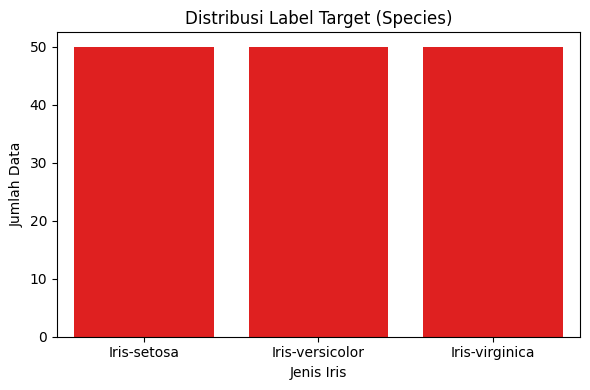

In [42]:

plt.figure(figsize=(6,4))
sns.countplot(
    x='Species',
    data=df,
    color='red'
)
plt.title('Distribusi Label Target (Species)')
plt.xlabel('Jenis Iris')
plt.ylabel('Jumlah Data')
plt.tight_layout()
plt.show()


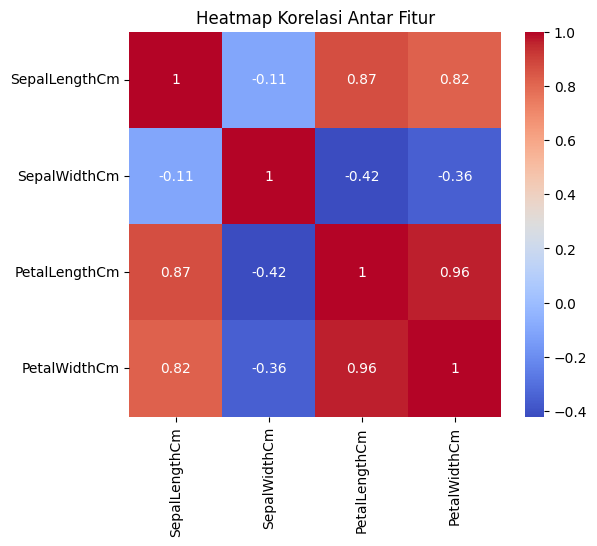

In [31]:

plt.figure(figsize=(6,5))
sns.heatmap(df.iloc[:,1:5].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

In [ ]:

model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [39]:

X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (150, 4)
y shape: (150,)


In [35]:

X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n🔹 Jumlah Data Training: {X_train.shape[0]}")
print(f"🔹 Jumlah Data Testing: {X_test.shape[0]}")


🔹 Jumlah Data Training: 120
🔹 Jumlah Data Testing: 30


In [ ]:

y_pred = model.predict(X_test)

print("Akurasi Model: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi Model: 93.33%

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



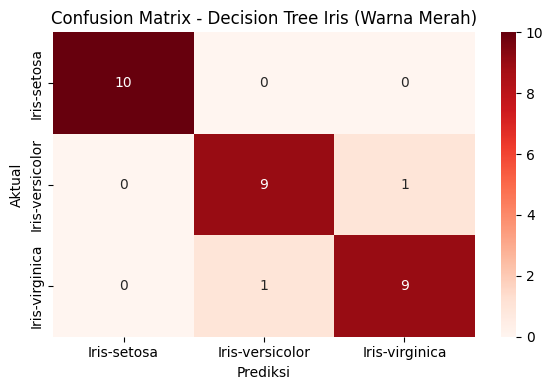

In [44]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='d',
    cmap='Reds',
    xticklabels=np.unique(y),
    yticklabels=np.unique(y)
)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Decision Tree Iris (Warna Merah)")
plt.tight_layout()
plt.show()



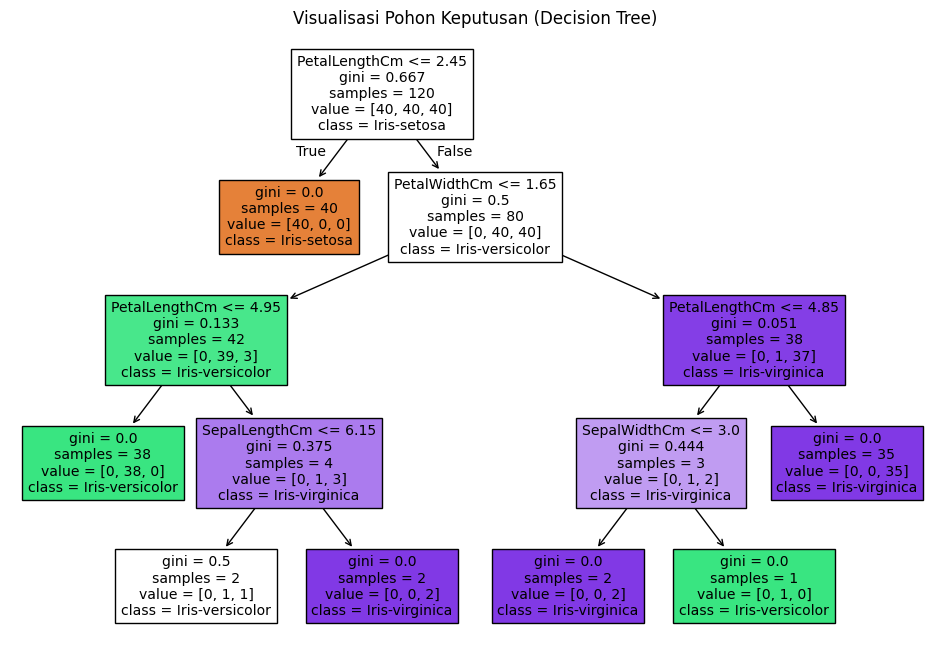

In [36]:

plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title("Visualisasi Pohon Keputusan (Decision Tree)")
plt.show()

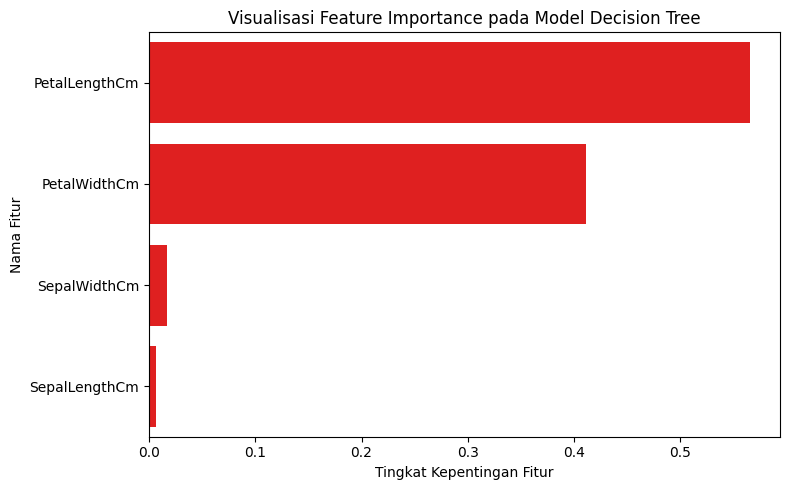

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=importance,
    x='Importance',
    y='Feature',
    color='red'
)
plt.title("Visualisasi Feature Importance pada Model Decision Tree")
plt.xlabel("Tingkat Kepentingan Fitur")
plt.ylabel("Nama Fitur")
plt.tight_layout()
plt.show()
